**US Airline Flight Routes and Fares 1993-2024***
Exploration of Airline Travel Patterns, Pricing, and Market Dynamics in the US

***About Dataset**
This dataset provides detailed information on airline flight routes, fares, and passenger volumes within the United States from 1993 to 2024. The data includes metrics such as the origin and destination cities, distances between airports, the number of passengers, and fare information segmented by different airline carriers. It serves as a comprehensive resource for analyzing trends in air travel, pricing, and carrier competition over a span of three decades.

### Read the data

Let’s read the .csv file.

📌 Use the read_csv() function of the Pandas library.

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans


ds=pd.read_csv('/kaggle/input/us-airline-flight-routes-and-fares-1993-2024/US Airline Flight Routes and Fares 1993-2024.csv',nrows=30000)
# veriyi df DataFrame'ine kaydeder

###Visualize the data
Then, take a look at the dataset using *data.head()* function.

In [6]:
ds.head() 
  # DataFrame'in ilk 5 satirini cagirir

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


With this information, we can create bars for each class and display the graph.

📌 Use the .bar() method to create the graph.

📌 Don't forget to use plt.show().

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


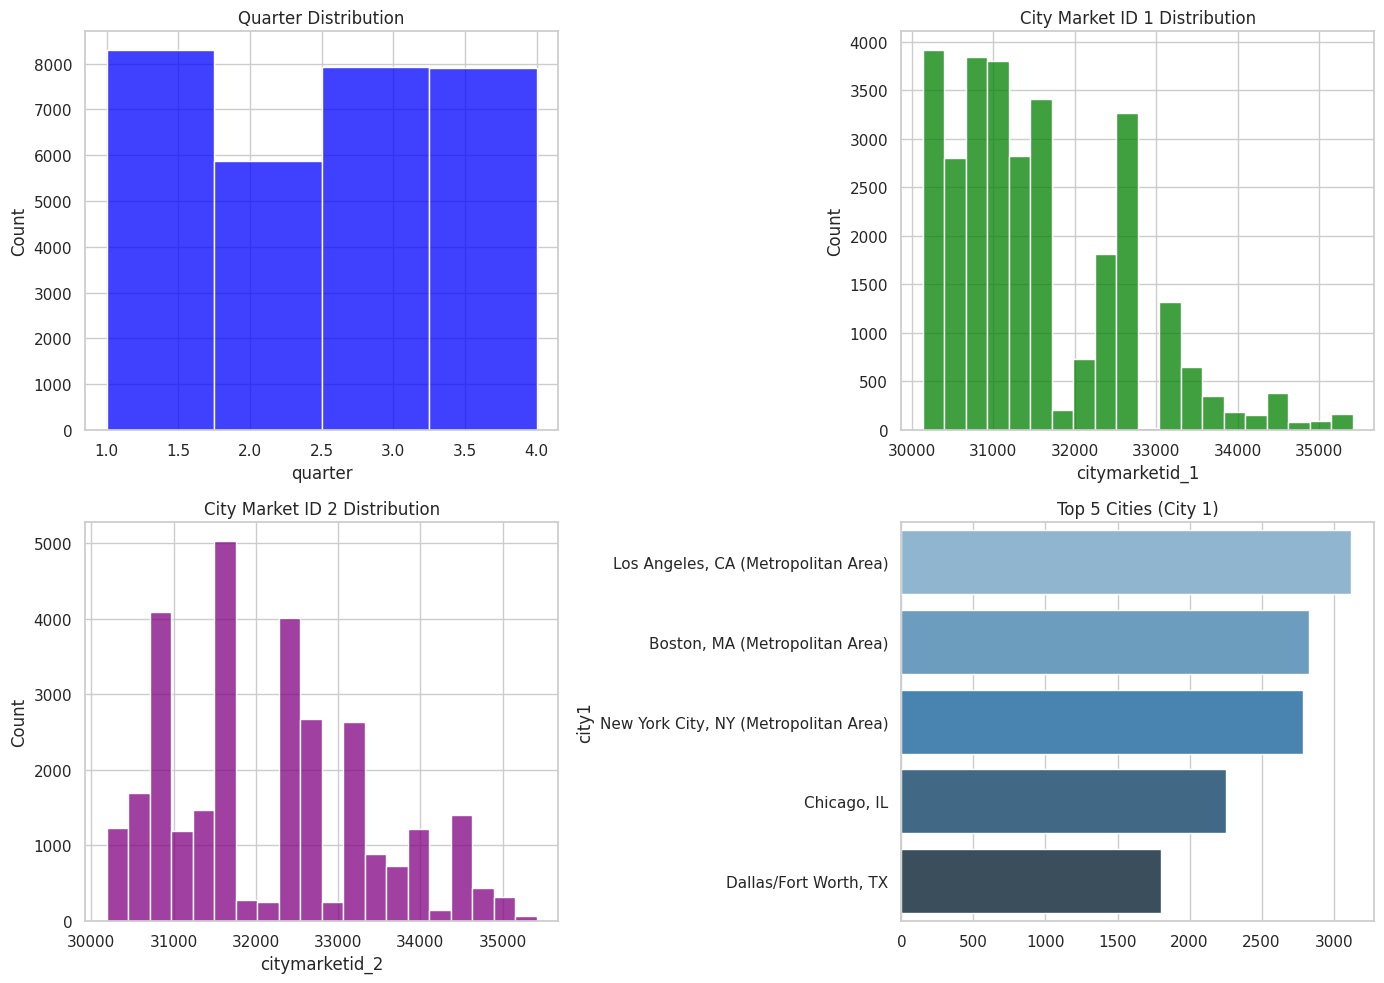

In [19]:

# Set the style for the plots
sns.set(style="whitegrid")

# Create a 2x2 grid of plots to show the visualizations for the columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for 'quarter' distribution
sns.histplot(ds['quarter'], bins=4, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Quarter Distribution')

# Plot for 'citymarketid_1'
sns.histplot(ds['citymarketid_1'], bins=20, ax=axes[0, 1], color='green')
axes[0, 1].set_title('City Market ID 1 Distribution')

# Plot for 'citymarketid_2'
sns.histplot(ds['citymarketid_2'], bins=20, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('City Market ID 2 Distribution')

# Bar plot for 'city1' showing top 5 cities
top_cities1 = ds['city1'].value_counts().nlargest(5)
sns.barplot(x=top_cities1.values, y=top_cities1.index, ax=axes[1, 1], palette='Blues_d')
axes[1, 1].set_title('Top 5 Cities (City 1)')

# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
# "Year" sütununa göre veri kümesini gruplayın ve her yılın ortalama "fare"sini hesaplayın
mean_fares_by_year = ds.groupby("Year")["fare"].mean()

# Hesaplanan ortalamaları yazdırın
print(mean_fares_by_year)

Year
1993    216.699023
1994    215.544639
1996    206.066370
1997    204.645154
1998    211.569779
1999    207.986742
2000    216.279664
2001    203.168130
2002    195.034384
2003    197.725298
2004    188.272488
2005    187.002283
2006    203.352306
2007    200.918509
2008    221.784644
2009    198.171116
2010    214.126640
2011    230.534916
2012    239.363187
2013    245.875363
2014    250.107575
2019    223.833918
2021    215.484911
2022    217.735779
Name: fare, dtype: float64


In [9]:
ds.info() # df DataFrame'in temel bilgilerine ulaşır

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tbl             30000 non-null  object 
 1   Year            30000 non-null  int64  
 2   quarter         30000 non-null  int64  
 3   citymarketid_1  30000 non-null  int64  
 4   citymarketid_2  30000 non-null  int64  
 5   city1           30000 non-null  object 
 6   city2           30000 non-null  object 
 7   airportid_1     30000 non-null  int64  
 8   airportid_2     30000 non-null  int64  
 9   airport_1       30000 non-null  object 
 10  airport_2       30000 non-null  object 
 11  nsmiles         30000 non-null  int64  
 12  passengers      30000 non-null  int64  
 13  fare            30000 non-null  float64
 14  carrier_lg      29809 non-null  object 
 15  large_ms        29809 non-null  float64
 16  fare_lg         29809 non-null  float64
 17  carrier_low     29800 non-null 

In [10]:
ds.isna().sum()
 # aslında üstte de görüldüğü gibi hiçbir null değer gelmediği için gerek yoktu

tbl                  0
Year                 0
quarter              0
citymarketid_1       0
citymarketid_2       0
city1                0
city2                0
airportid_1          0
airportid_2          0
airport_1            0
airport_2            0
nsmiles              0
passengers           0
fare                 0
carrier_lg         191
large_ms           191
fare_lg            191
carrier_low        200
lf_ms              200
fare_low           200
Geocoded_City1    6122
Geocoded_City2    6122
tbl1apk              0
dtype: int64

In [11]:
ds.duplicated().sum() 
# benzersiz satir sayisini bulur
# eger kendisinden bir tane daha ayni satir varsa True'ları sayısını dondurur, yoksa False'ların sayısını dondurur

0

In [12]:
ds.tail()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
29995,Table 1a,2010,1,30615,30852,"El Paso, TX","Washington, DC (Metropolitan Area)",11540,10821,ELP,...,255.71,WN,0.42,220.59,WN,0.42,220.59,"El Paso, TX\n(31.76006, -106.492257)","Washington, DC (Metropolitan Area)\n(38.892062...",201011154010821ELPBWI
29996,Table 1a,1997,2,32337,31703,"Indianapolis, IN","New York City, NY (Metropolitan Area)",12339,12478,IND,...,130.18,TZ,0.60,102.38,TZ,0.60,102.38,"Indianapolis, IN\n(39.76845, -86.156212)","New York City, NY (Metropolitan Area)\n(40.123...",199721233912478INDJFK
29997,Table 1a,2005,3,32457,30559,"San Francisco, CA (Metropolitan Area)","Seattle, WA",14771,14747,SFO,...,161.62,AS,0.47,146.94,AS,0.47,146.94,"San Francisco, CA (Metropolitan Area)\n(37.780...","Seattle, WA\n(47.603229, -122.33028)",200531477114747SFOSEA
29998,Table 1a,1993,2,30721,31995,"Boston, MA (Metropolitan Area)","Greensboro/High Point, NC",13296,11995,MHT,...,204.29,US,0.80,217.77,CO,0.16,125.57,"Boston, MA (Metropolitan Area)\n(42.358894, -7...","Greensboro/High Point, NC\n(36.072701, -79.793...",199321329611995MHTGSO
29999,Table 1a,1996,1,31453,30466,"Houston, TX","Phoenix, AZ",12191,14107,HOU,...,146.79,WN,0.96,146.06,WN,0.96,146.06,"Houston, TX\n(29.760803, -95.369506)","Phoenix, AZ\n(30.406931, -87.217578)",199611219114107HOUPHX


<Axes: >

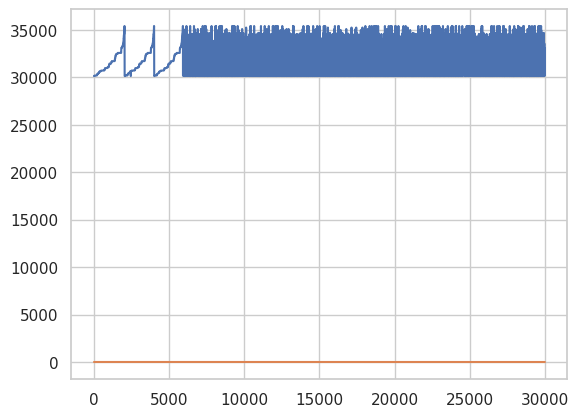

In [13]:
ds1=ds["citymarketid_1"]
ds1.plot()
ds2=ds["quarter"]
ds2.plot()

In [14]:
ds.corr

<bound method DataFrame.corr of             tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0       Table1a  2021        3           30135           33195   
1       Table1a  2021        3           30135           33195   
2       Table1a  2021        3           30140           30194   
3       Table1a  2021        3           30140           30194   
4       Table1a  2021        3           30140           30466   
...         ...   ...      ...             ...             ...   
29995  Table 1a  2010        1           30615           30852   
29996  Table 1a  1997        2           32337           31703   
29997  Table 1a  2005        3           32457           30559   
29998  Table 1a  1993        2           30721           31995   
29999  Table 1a  1996        1           31453           30466   

                                       city1  \
0             Allentown/Bethlehem/Easton, PA   
1             Allentown/Bethlehem/Easton, PA   
2                            Al

In [15]:
# Korelasyon hesaplamak için kullanılacak sütunları seçelim
df_corr = ds[['quarter', 'citymarketid_1', 'citymarketid_2', 'fare']]

# Korelasyon matrisi oluşturma
correlation_matrix = df_corr.corr()

# Korelasyon matrisini görüntüleyelim
print(correlation_matrix)


                 quarter  citymarketid_1  citymarketid_2      fare
quarter         1.000000        0.005498        0.003304 -0.027437
citymarketid_1  0.005498        1.000000        0.011167  0.034651
citymarketid_2  0.003304        0.011167        1.000000  0.010320
fare           -0.027437        0.034651        0.010320  1.000000


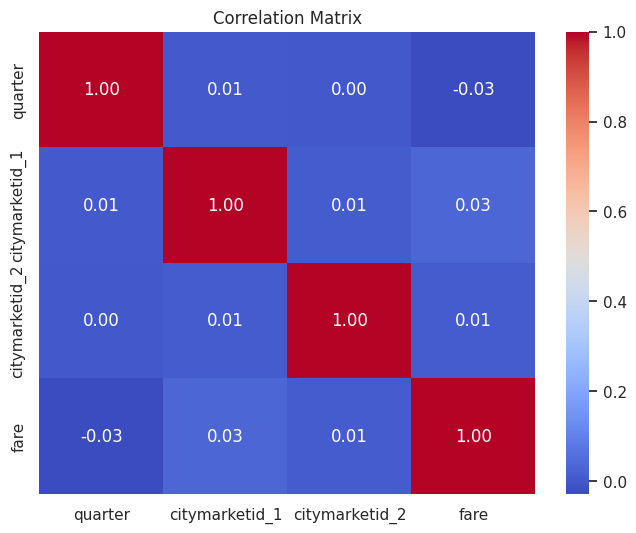

In [16]:
# Korelasyon matrisini ısı haritası ile görselleştirme
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [18]:
df_kmeans = ds[['quarter', 'citymarketid_1', 'citymarketid_2', 'fare']]